# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [19]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
initial_data = pd.read_csv('zillow_data.csv')
print(len(initial_data))
initial_data.head(10)

14723


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [21]:
# to view all NaN values for median housing price in zip code
columns = list(initial_data.columns)
nans = list(initial_data.isna().sum())
for item in zip(columns, nans):
    print(item)

('RegionID', 0)
('RegionName', 0)
('City', 0)
('State', 0)
('Metro', 1043)
('CountyName', 0)
('SizeRank', 0)
('1996-04', 1039)
('1996-05', 1039)
('1996-06', 1039)
('1996-07', 1039)
('1996-08', 1039)
('1996-09', 1039)
('1996-10', 1039)
('1996-11', 1039)
('1996-12', 1039)
('1997-01', 1039)
('1997-02', 1039)
('1997-03', 1039)
('1997-04', 1039)
('1997-05', 1039)
('1997-06', 1039)
('1997-07', 1038)
('1997-08', 1038)
('1997-09', 1038)
('1997-10', 1038)
('1997-11', 1038)
('1997-12', 1038)
('1998-01', 1036)
('1998-02', 1036)
('1998-03', 1036)
('1998-04', 1036)
('1998-05', 1036)
('1998-06', 1036)
('1998-07', 1036)
('1998-08', 1036)
('1998-09', 1036)
('1998-10', 1036)
('1998-11', 1036)
('1998-12', 1036)
('1999-01', 1036)
('1999-02', 1036)
('1999-03', 1036)
('1999-04', 1036)
('1999-05', 1036)
('1999-06', 1036)
('1999-07', 1036)
('1999-08', 1036)
('1999-09', 1036)
('1999-10', 1036)
('1999-11', 1036)
('1999-12', 1036)
('2000-01', 1036)
('2000-02', 1036)
('2000-03', 1036)
('2000-04', 1036)
('2000-05

In [22]:
initial_data[initial_data['2014-06'].isna()].head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2946,73623,35810,Huntsville,AL,Huntsville,Madison,2947,NaN,NaN,NaN,...,61000,61000,61100,61900,62800,63200,63700,65200,67500,69400
3330,58630,2116,Boston,MA,Boston,Suffolk,3331,NaN,NaN,NaN,...,1931100,1995600,2031100,2049600,2057800,2064500,2037600,2056900,2106500,2136500
6153,73629,35816,Huntsville,AL,Huntsville,Madison,6154,NaN,NaN,NaN,...,61500,62500,62800,63300,64100,65100,66600,68700,70400,71300
7587,78091,46320,Hammond,IN,Chicago,Lake,7588,NaN,NaN,NaN,...,66000,67900,68200,68700,69600,69400,68500,68500,68200,67200
7635,78566,47371,Portland,IN,NaN,Jay,7636,NaN,NaN,NaN,...,86300,86600,87400,88200,89100,90300,90400,89100,88000,88100
8263,88723,70647,Iowa,LA,Lake Charles,Calcasieu,8264,NaN,NaN,NaN,...,111600,117900,125300,128900,129600,130800,132100,132700,132400,132300
8338,73630,35824,Huntsville,AL,Huntsville,Madison,8339,NaN,NaN,NaN,...,217200,216800,216300,215100,215700,218200,222000,226200,230300,231800
8668,75206,39202,Jackson,MS,Jackson,Hinds,8669,NaN,NaN,NaN,...,152700,154300,155800,157500,158100,158300,158400,157900,156600,155300
8746,90561,74857,Norman,OK,Oklahoma City,Cleveland,8747,NaN,NaN,NaN,...,141800,141800,141700,141700,142000,143600,145600,145700,143900,141900
8780,78097,46327,Hammond,IN,Chicago,Lake,8781,NaN,NaN,NaN,...,75200,74600,73200,72500,72800,73200,72700,72900,74000,74400


In [126]:
def fix_zipcodes(zipcode):
    if len(zipcode) == 5:
        return zipcode
    else:
        return '0'+zipcode

In [134]:
cut_data = initial_data.drop(['RegionID', 'City', 'State', 'CountyName', 'SizeRank', 'Metro'], axis=1)
cut_data.rename({'RegionName': 'zipcode'}, axis=1, inplace=True)
cut_data['zipcode'] = cut_data.zipcode.astype(str)
cut_data['zipcode'] = cut_data['zipcode'].apply(lambda z: fix_zipcodes(z))
cut_data.head()

,zipcode,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [34]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [25]:
cut_data.columns = [cut_data.columns[0]] + list(get_datetimes(cut_data))

# Step 3: Reshape from Wide to Long Format

In [26]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 
                                  'CountyName', 'RegionID', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').agg({'value':'median'})

In [27]:
monthly_medians = melt_data(initial_data)

In [110]:
monthly_medians.head()

,value
time,
1996-04-01,99500.0
1996-05-01,99500.0
1996-06-01,99700.0
1996-07-01,99700.0
1996-08-01,99800.0


In [55]:
zipcodes = []
time_series = []
for row in range(len(cut_data)):
    zipcodes.append(cut_data.iloc[row]['zipcode'])
    series = pd.DataFrame(cut_data.iloc[row].iloc[1:]).rename({row:'values'}, axis=1)
    time_series.append(series)

In [56]:
for zipcode in time_series:
    for j in range(len(zipcode)):
        if np.isnan(zipcode.iloc[-1-j].values[0]):
            base = zipcode.iloc[-j].values[0]
            ratio = monthly_medians.iloc[-1-j].values[0] / monthly_medians.iloc[-j].values[0]
            zipcode.iloc[-1-j] = round(base * ratio, 2)

In [57]:
zipcodes[:5]

[60657, 75070, 77494, 60614, 79936]

In [105]:
time_series[2946].head()

,values
1996-04-01,35114.17
1996-05-01,35114.17
1996-06-01,35184.75
1996-07-01,35184.75
1996-08-01,35220.04


# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [48]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

# matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [107]:
min(monthly_medians.values)

array([99500.])

We used http://www.in2013dollars.com/1996-dollars-in-2018?amount=99500 to get a table for inflation's effect on prices from 1996 (the beginning of our data set) to 2018 (the end of our dataset)

In [108]:
inflation_data = pd.read_csv('inflation_data.csv')
inflation_data['year'] = pd.to_datetime(inflation_data['year'], format='%Y')
inflation_data.drop('inflation rate', axis=1, inplace=True)
inflation_data.set_index('year', inplace=True)
inflation_data.head()

,amount
year,
1996-01-01,99500.000000
1997-01-01,101782.982792
1998-01-01,103368.387508
1999-01-01,105651.370300
2000-01-01,109202.676864


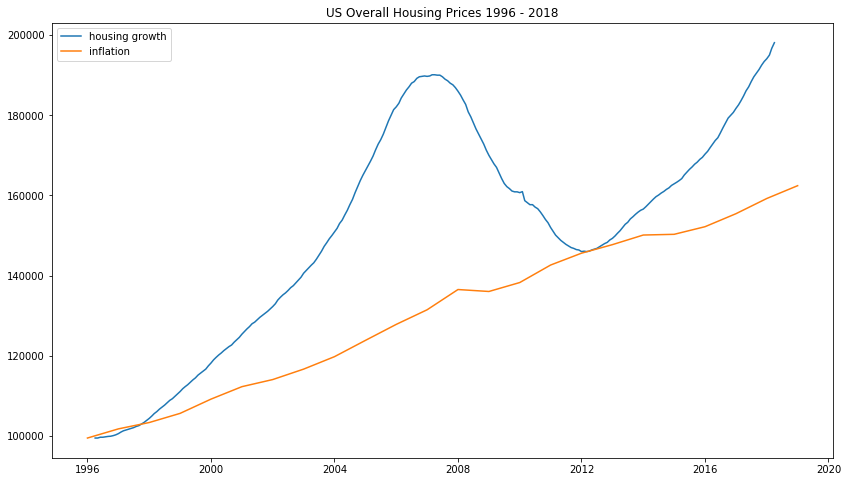

In [109]:
plt.figure(figsize=(14,8))
plt.plot(monthly_medians, label='housing growth')
plt.plot(inflation_data, label='inflation')
plt.title('US Overall Housing Prices 1996 - 2018')
plt.legend()
plt.show()

In [ ]:
def

In [157]:
percent_growth_by_zip = []
for zipcode in time_series:
    percent_for_zip = zipcode.loc['1996'].values[0][0] / zipcode.loc['2008'].values[0][0]
    percent_growth_by_zip.append(percent_for_zip)

In [158]:
indexes = sorted(range(len(percent_growth_by_zip)), key=lambda i: percent_growth_by_zip[i], reverse=True)[-5:]
indexes

[10050, 4149, 4381, 13440, 5278]

<function matplotlib.pyplot.show(*args, **kw)>

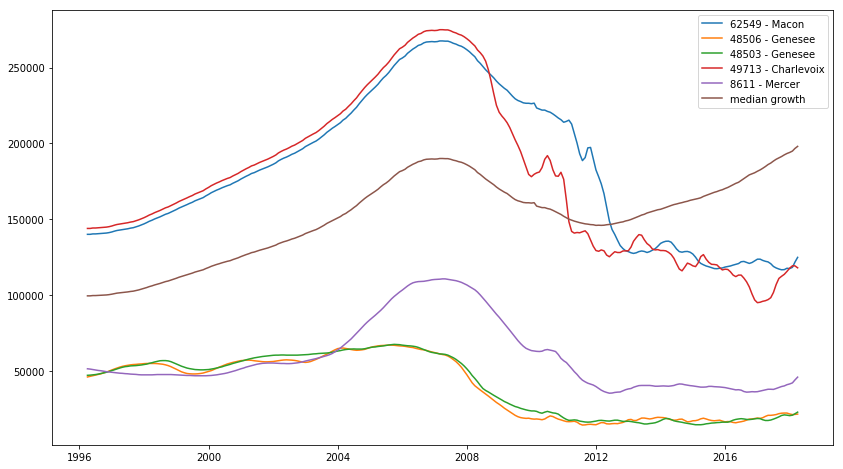

In [166]:
plt.figure(figsize=(14,8))
for i in indexes:
    plt.plot(time_series[i], label=str(zipcodes[i])+' - '+str(initial_data.iloc[i]['CountyName']))
plt.plot(monthly_medians, label='median growth')
plt.legend()
plt.show

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

# Step 6: Interpreting Results
Give a detailed interpretation of results including the relationship between the inputs and output of the model.

# Working Zone

In [13]:
for zipcode in time_series:
    for i in range(1, len(zipcode)+1):
        if zipcode.iloc[-i].values == 0:
            zipcode.iloc[-i] = round(float(zipcode.iloc[-i+1].values * (melted_data.iloc[-i].values / 
                                                                        melted_data.iloc[-i+1].values)), 0)